# Description

This dataset is part of the [Kaggle Playground Series 2025 competition](https://www.kaggle.com/competitions/playground-series-s5e7/data).
The goal is to predict if a person is an Introvert or an Extrovert based on their social behavior and personality traits.

The dataset contains the following features:

Time_spent_Alone → Hours a person spends alone.

Stage_fear → If the person has stage fear (Yes/No).

Social_event_attendance → How often they attend social events.

Going_outside → Frequency of going outside.

Drained_after_socializing → Whether they feel drained after socializing (Yes/No).

Friends_circle_size → Number of close friends.

Post_frequency → How often they post online.

Personality → Target column (Introvert or Extrovert).

# Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler, RobustScaler,PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import pickle

# Understanding the Dataset

In [36]:
df1 = pd.read_csv(r'train.csv')
df2 = pd.read_csv(r'test.csv')
submission = pd.read_csv(r'sample_submission.csv')

In [3]:
df1.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
df1.shape

(18524, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
df1.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
df2.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [8]:
df2.shape

(6175, 8)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [10]:
df2.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,6175.000000,5750.000000,5778.000000,5709.000000,5825.000000,5767.000000
mean,21611.000000,3.116870,5.287989,4.037835,8.008412,5.028958
std,1782.713288,2.985658,2.758052,2.045207,4.192701,2.867285
min,18524.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20067.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,21611.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,23154.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


# Handling Null & Duplicated Values

In [11]:
df1.duplicated().sum()

np.int64(0)

In [12]:
df2.duplicated().sum()

np.int64(0)

In [13]:
df1.isna().sum().sort_values(ascending=False)

Stage_fear                   1893
Going_outside                1466
Post_frequency               1264
Time_spent_Alone             1190
Social_event_attendance      1180
Drained_after_socializing    1149
Friends_circle_size          1054
id                              0
Personality                     0
dtype: int64

In [14]:
df1.select_dtypes(include='object').columns

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

In [15]:
X_train = df1.drop(['id','Personality'],axis=1)
y_train = df1['Personality']

X_test = df2.drop('id',axis=1)

In [16]:
col = ['Stage_fear', 'Drained_after_socializing']
for i in col:
    le = LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])
    
    with open(f"Files/Label_encoding_{i}.pkl", 'wb') as f:
        pickle.dump(le, f)
print('Done')

Done


In [17]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

with open(f"Files/LabelEncoder_y.pkl", 'wb') as f:
    pickle.dump(le, f)

In [18]:
im = IterativeImputer(missing_values=np.nan,max_iter=15 ,random_state=42,)
col = X_train.select_dtypes(include='number').columns

X_train[col] = im.fit_transform(X_train[col])
X_test[col] = im.transform(X_test[col])

with open(f'Files/IterativeImputer.pkl','wb') as f:
    pickle.dump(im, f)

In [19]:
for c in col:
    print(f'{c}:\n min: {X_train[c].min()}, max: {X_train[c].max()}')

print('========')

for c in col:
    print(f'{c}:\n min: {X_test[c].min()}, max: {X_test[c].max()}')

Time_spent_Alone:
 min: -0.2586105385666464, max: 11.0
Stage_fear:
 min: 0.0, max: 2.0
Social_event_attendance:
 min: 0.0, max: 10.0
Going_outside:
 min: 0.0, max: 7.0
Drained_after_socializing:
 min: 0.0, max: 2.0
Friends_circle_size:
 min: 0.0, max: 15.0
Post_frequency:
 min: 0.0, max: 10.0
Time_spent_Alone:
 min: -0.10226340044055338, max: 11.0
Stage_fear:
 min: 0.0, max: 2.0
Social_event_attendance:
 min: 0.0, max: 10.0
Going_outside:
 min: 0.0, max: 7.0
Drained_after_socializing:
 min: 0.0, max: 2.0
Friends_circle_size:
 min: 0.0, max: 15.0
Post_frequency:
 min: 0.0, max: 10.0


In [20]:
X_train.loc[X_train['Time_spent_Alone'] < 0, 'Time_spent_Alone'] = 0
X_test.loc[X_test['Time_spent_Alone'] < 0, 'Time_spent_Alone'] = 0

# Visualization

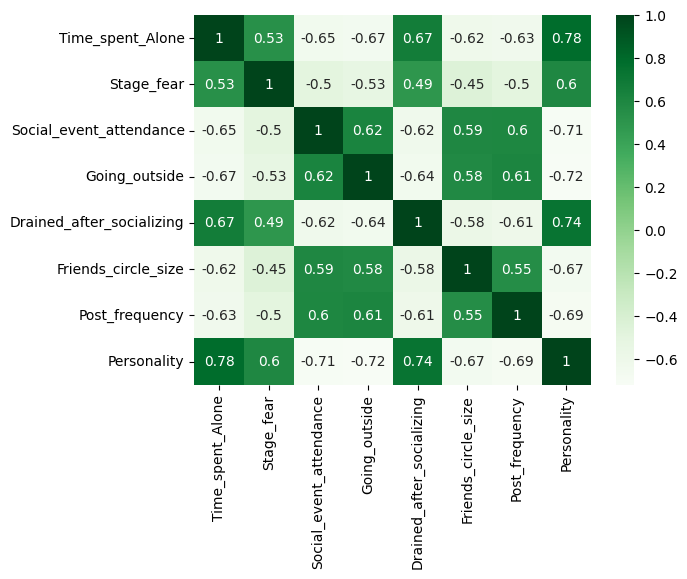

In [21]:
y_train = pd.Series(y_train, name="Personality")
train_corr = pd.concat([X_train, y_train], axis=1)

sns.heatmap(train_corr.corr(numeric_only=True),annot=True, cmap='Greens')
plt.show()

C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2206557296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='Personality', palette="PuRd")


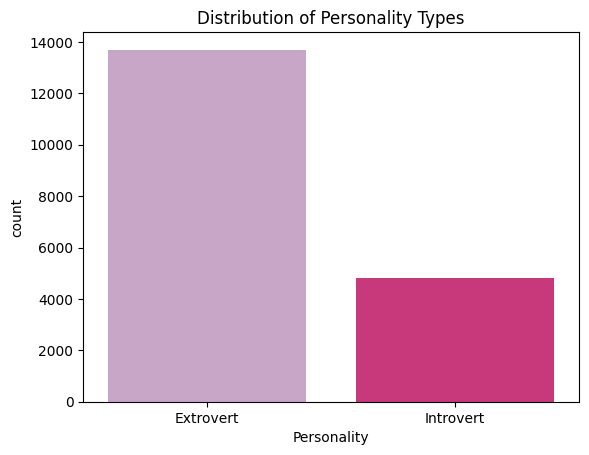

In [22]:
sns.countplot(data=df1, x='Personality', palette="PuRd")
plt.title("Distribution of Personality Types")
plt.show()

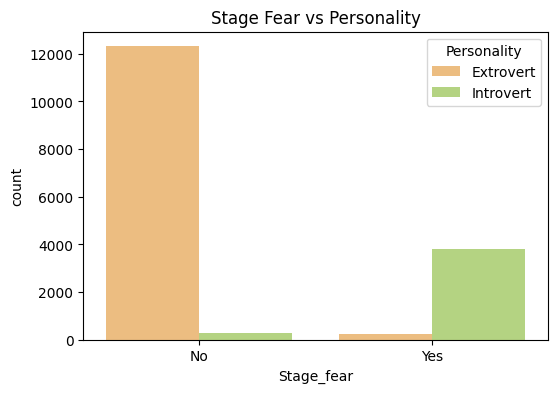

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df1, x='Stage_fear', hue='Personality', palette="RdYlGn")
plt.title("Stage Fear vs Personality")
plt.show()

C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2446480027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Personality', y='Social_event_attendance', estimator="mean", palette="Purples")


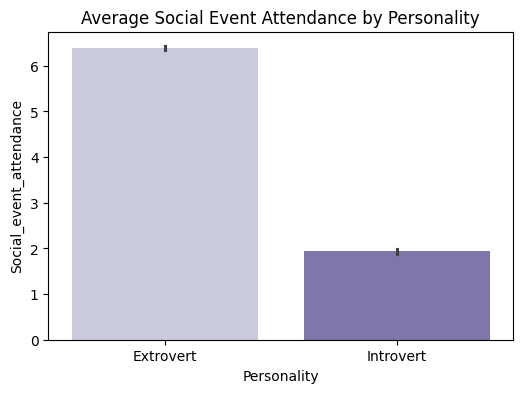

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=df1, x='Personality', y='Social_event_attendance', estimator="mean", palette="Purples")
plt.title("Average Social Event Attendance by Personality")
plt.show()

# Handling Outliers

C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2965745814.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_hist = cm.get_cmap("RdBu", 2)
C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2965745814.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_box = cm.get_cmap("PRGn", 2)


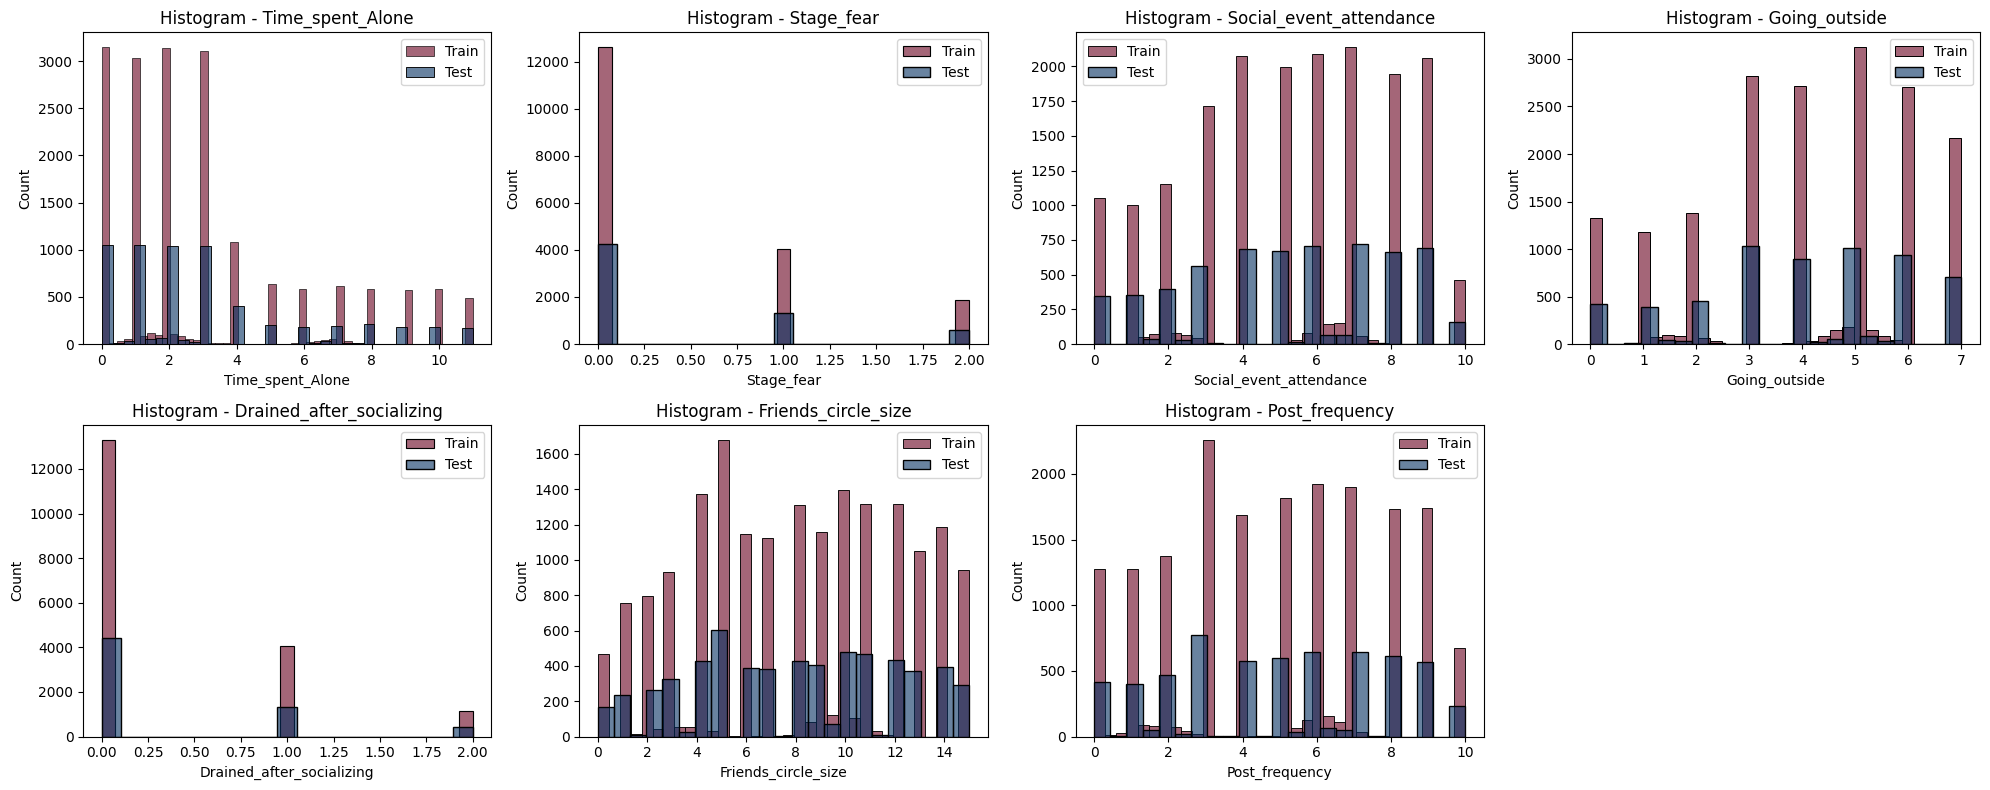

C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2965745814.py:33: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[X_train[col], X_test[col]], palette=[train_color_box, test_color_box])
C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2965745814.py:33: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[X_train[col], X_test[col]], palette=[train_color_box, test_color_box])
C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2965745814.py:33: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[X_train[col], X_test[col]], palette=[train_color_box, test_color_box])
C:\Users\mena1\AppData\Local\Temp\ipykernel_30240\2965745814.py:33: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[X_train[col], X_test[col]], palette=[train_color_box, test_

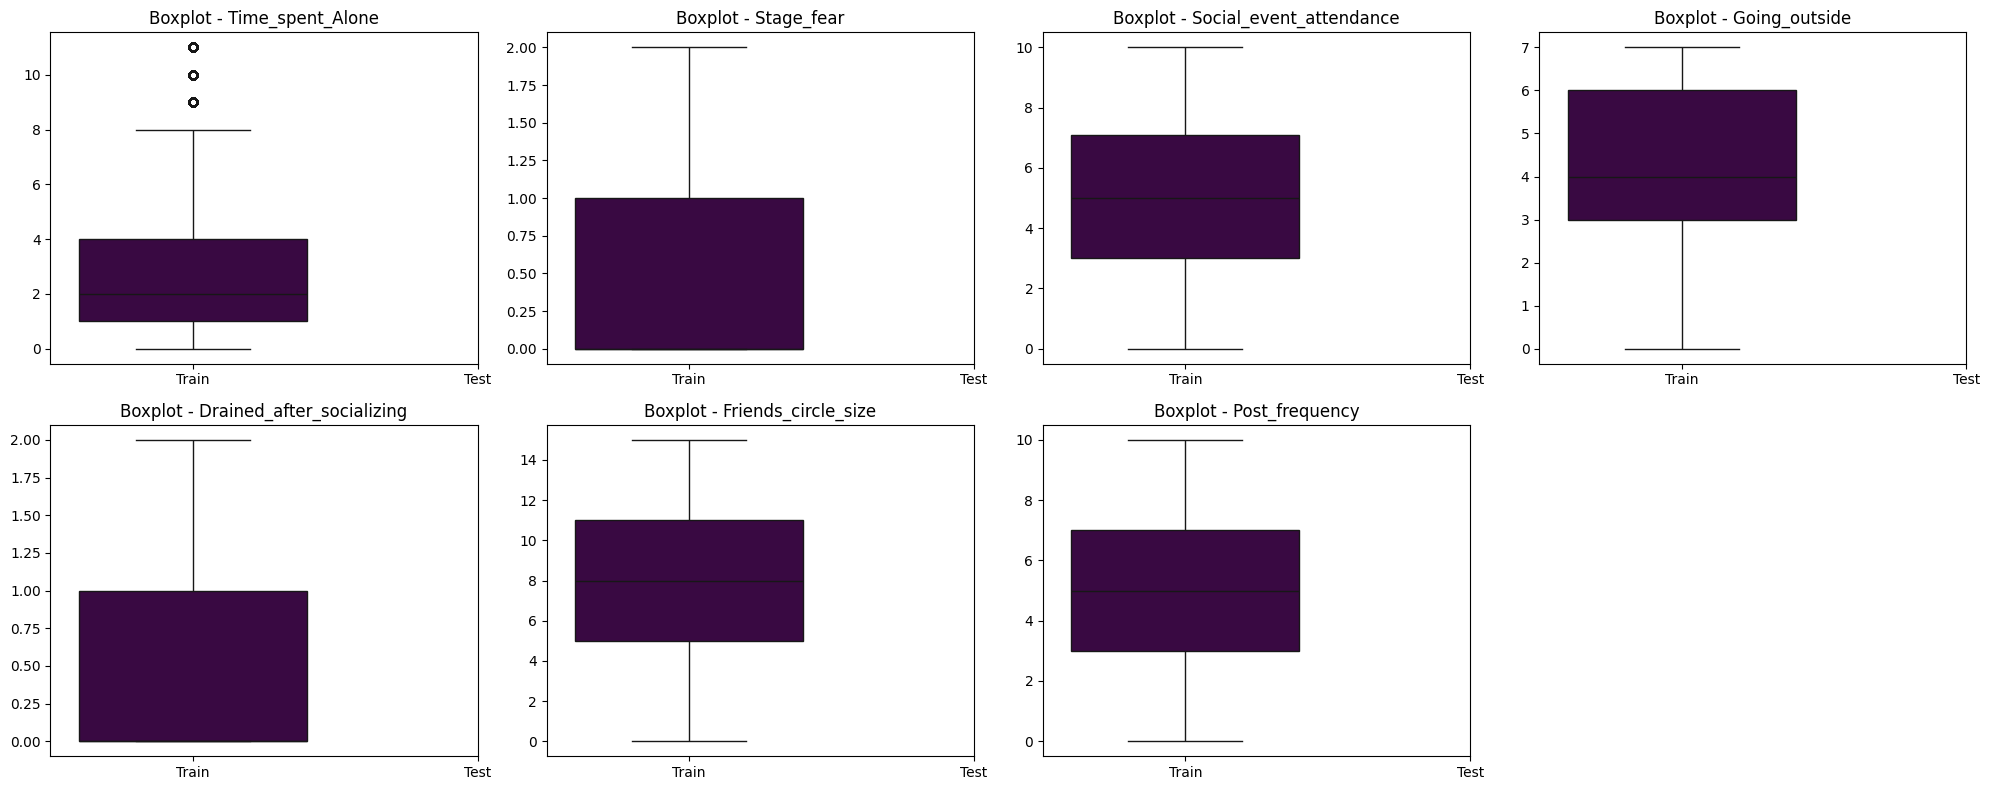

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

numeric_cols = X_train.columns  
n_cols = 4  
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols 

cmap_hist = cm.get_cmap("RdBu", 2)   
cmap_box = cm.get_cmap("PRGn", 2)   

train_color_hist = cmap_hist(0)
test_color_hist = cmap_hist(1)

train_color_box = cmap_box(0)
test_color_box = cmap_box(1)

# ================== Histograms ==================
plt.figure(figsize=(20, n_rows*4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(x=X_train[col], color=train_color_hist, edgecolor='black', label="Train", alpha=0.6)
    sns.histplot(x=X_test[col], color=test_color_hist, edgecolor='black', label="Test", alpha=0.6)
    plt.title(f"Histogram - {col}")
    plt.legend()
plt.tight_layout()
plt.show()

# ================== Boxplots ==================
plt.figure(figsize=(20, n_rows*4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(data=[X_train[col], X_test[col]], palette=[train_color_box, test_color_box])
    plt.xticks([0, 1], ['Train', 'Test'])
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()


In [26]:
skew_values = {}
for col in numeric_cols:
    skew_values[col] = skew(X_train[col].dropna())  

skew_df = pd.DataFrame.from_dict(skew_values, orient='index', columns=['Skewness'])

skew_df_sorted = skew_df.sort_values(by='Skewness', ascending=True)

print("Skewness values sorted (closest to normal first):")
print(skew_df_sorted)


Skewness values sorted (closest to normal first):
                           Skewness
Going_outside             -0.365415
Social_event_attendance   -0.225099
Post_frequency            -0.056194
Friends_circle_size       -0.055602
Time_spent_Alone           1.145174
Stage_fear                 1.309582
Drained_after_socializing  1.524598


In [27]:
norm_cols = ['Going_outside', 'Social_event_attendance', 'Post_frequency','Friends_circle_size']
skewed_cols = ['Stage_fear', 'Drained_after_socializing']
robust_col = ['Time_spent_Alone']

In [28]:
standard = StandardScaler()
X_train[norm_cols] = standard.fit_transform(X_train[norm_cols])
X_test[norm_cols] = standard.transform(X_test[norm_cols])

with open('Files/StandardScaler.pkl', 'wb') as f:
    pickle.dump(standard, f)

In [29]:
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
X_train[skewed_cols] = yeo.fit_transform(X_train[skewed_cols])
X_test[skewed_cols] = yeo.transform(X_test[skewed_cols])

with open('Files/yeo-johnson.pkl', 'wb') as f:
    pickle.dump(yeo,f)

In [30]:
robust = RobustScaler()
X_train[robust_col] = robust.fit_transform(X_train[robust_col])
X_test[robust_col] = robust.transform(X_test[robust_col])

with open('Files/RobustScaler.pkl', 'wb') as f:
    pickle.dump(robust,f)

In [32]:
with open("Files/X_test.pkl", "wb") as f:
    pickle.dump(X_train, f)

with open("Files/y_test.pkl", "wb") as f:
    pickle.dump(y_train, f)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# The Models

In [33]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "GaussianNB": GaussianNB(),

    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(), 
        n_estimators=50, 
        random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=100, 
        learning_rate=0.5, 
        random_state=42
    ),
    
    "XGBoost": XGBClassifier(
        n_estimators=200, 
        learning_rate=0.1, 
        max_depth=6, 
        random_state=42, 
        use_label_encoder=False, 
        eval_metric="mlogloss",
        verbose=0 
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=200, 
        learning_rate=0.1, 
        max_depth=-1, 
        random_state=42,
        verbose=0 
    ),
    "CatBoost": CatBoostClassifier(
        iterations=200, 
        learning_rate=0.1, 
        depth=6, 
        random_state=42,
        verbose=0  
    )
}

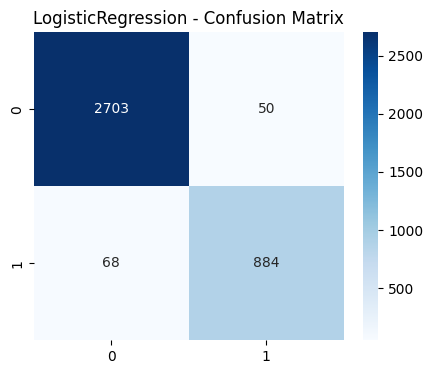

Saving Model 'LogisticRegression' is Done


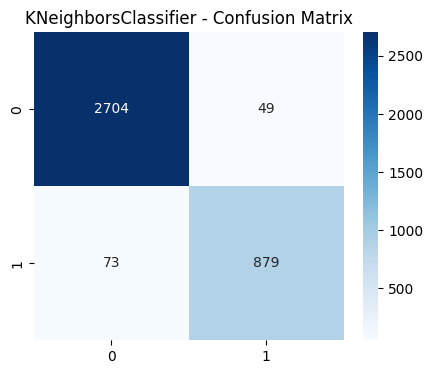

Saving Model 'KNeighborsClassifier' is Done


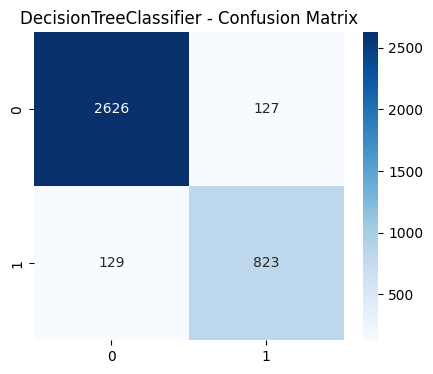

Saving Model 'DecisionTreeClassifier' is Done


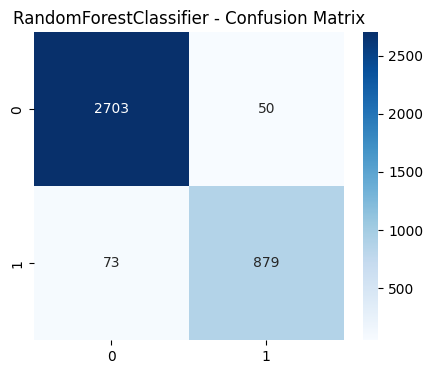

Saving Model 'RandomForestClassifier' is Done


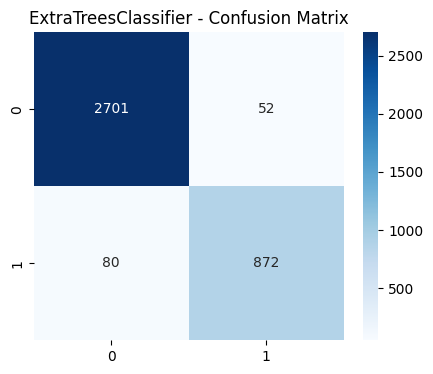

Saving Model 'ExtraTreesClassifier' is Done


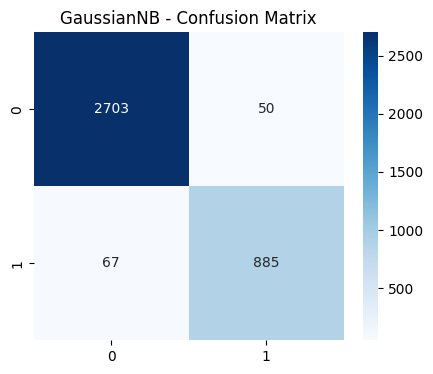

Saving Model 'GaussianNB' is Done


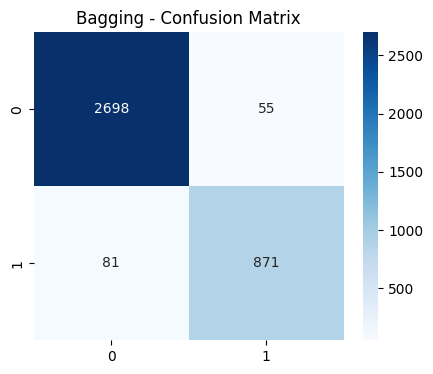

Saving Model 'Bagging' is Done


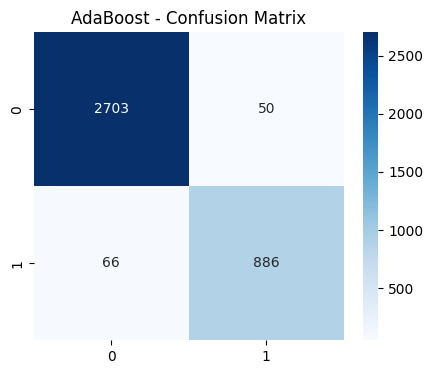

Saving Model 'AdaBoost' is Done


c:\Users\mena1\anaconda3\envs\ml_env313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:28:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


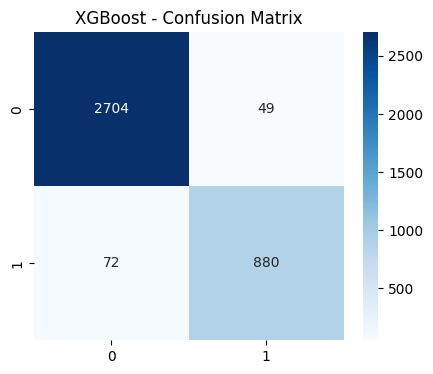

Saving Model 'XGBoost' is Done


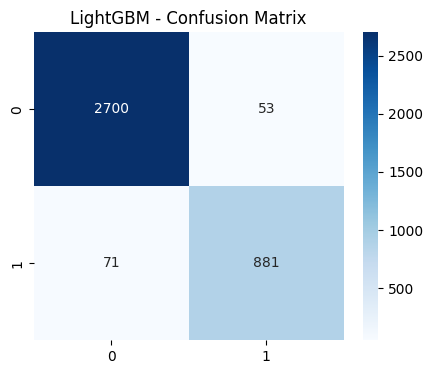

Saving Model 'LightGBM' is Done


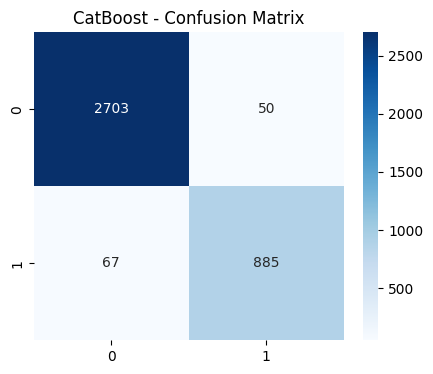

Saving Model 'CatBoost' is Done
Best model: AdaBoost


In [41]:
metrics_list = []
class_names = [str(c) for c in np.unique(y_val)]

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    pre = precision_score(y_val, y_pred, average='binary')
    rec = recall_score(y_val, y_pred, average='binary')
    f1 = f1_score(y_val, y_pred, average='binary')
    
    metrics_list.append([name, acc, pre, rec, f1])
    
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    filename = f'Files/{name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Saving Model '{name}' is Done")

best_model_name = max(metrics_list, key=lambda x: x[3])[0]
print(f"Best model: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

test_pred = best_model.predict(X_test)

submission["Personality"] = pd.Series(test_pred).map({0: "Extrovert", 1: "Introvert"})
submission = submission[["id", "Personality"]]  
submission.to_csv("fin_submission.csv", index=False)


In [42]:
results_df = pd.DataFrame(metrics_list, columns=['Model','Accuracy','Precision','Recall','F1'])
results_df.sort_values('Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1
0,LogisticRegression,0.968151,0.946467,0.928571,0.937434
1,KNeighborsClassifier,0.967072,0.947198,0.923319,0.935106
2,DecisionTreeClassifier,0.930904,0.866316,0.864496,0.865405
3,RandomForestClassifier,0.966802,0.946179,0.923319,0.934609
4,ExtraTreesClassifier,0.964372,0.943723,0.915966,0.929638
5,GaussianNB,0.968421,0.946524,0.929622,0.937997
6,Bagging,0.963293,0.940605,0.914916,0.927583
7,AdaBoost,0.968691,0.946581,0.930672,0.938559
8,XGBoost,0.967341,0.947255,0.924370,0.935673
9,LightGBM,0.966532,0.943255,0.925420,0.934252


In [46]:
results_dict = {}

class_names = [str(c) for c in np.unique(y_val)]

for name, model in models.items():
    y_pred = model.predict(X_val)
    
    acc = accuracy_score(y_val, y_pred)
    pre = precision_score(y_val, y_pred, average='binary')
    rec = recall_score(y_val, y_pred, average='binary')
    f1 = f1_score(y_val, y_pred, average='binary')
    
    cm = confusion_matrix(y_val, y_pred)
    cls_report = classification_report(y_val, y_pred, output_dict=True)

    results_dict[name] = {
        'metrics': {'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'F1': f1},
        'confusion_matrix': cm,
        'classification_report': cls_report,
        'class_names': class_names
    }

with open('Files/results_dict.pkl', 'wb') as f:
    pickle.dump(results_dict, f)

print("All results saved to 'Files/results_dict.pkl'")


All results saved to 'Files/results_dict.pkl'
